In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [28]:
# https://archive.ics.uci.edu/ml/datasets/wine
    
wine = pd.read_csv('wine.data')
wine.shape

(177, 14)

In [29]:
wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [30]:
wine.columns

Index(['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '.28',
       '2.29', '5.64', '1.04', '3.92', '1065'],
      dtype='object')

In [31]:
wine=wine.rename({'1':'target', '14.23':'Alcohol', '1.71':'Malic acid', '2.43':'Ash', '15.6':'Alcalinity', '127':'Magnesium',
             '2.8':'Total phenols', '3.06':'Flavanoids', '.28':'Nonflavanoid phenols', '2.29':'Proanthocyanins', '5.64':'Color intensity',
             '1.04':'Hue', '3.92':'diluted wines', '1065':'Proline'},axis=1)

In [32]:
wine.sample(10)

,target,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
103,2,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672
61,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
82,2,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515
140,3,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780
160,3,13.69,3.26,2.54,20.0,107,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680
113,2,12.08,1.39,2.50,22.5,84,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385
29,1,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
162,3,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675
108,2,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [33]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   target                177 non-null    int64  
 1   Alcohol               177 non-null    float64
 2   Malic acid            177 non-null    float64
 3   Ash                   177 non-null    float64
 4   Alcalinity            177 non-null    float64
 5   Magnesium             177 non-null    int64  
 6   Total phenols         177 non-null    float64
 7   Flavanoids            177 non-null    float64
 8   Nonflavanoid phenols  177 non-null    float64
 9   Proanthocyanins       177 non-null    float64
 10  Color intensity       177 non-null    float64
 11  Hue                   177 non-null    float64
 12  diluted wines         177 non-null    float64
 13  Proline               177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [7]:
# data is discrete and not continuous. lets make bins

wine['Alcohol']=pd.qcut(wine['Alcohol'],q=5)
wine['Malic acid']=pd.qcut(wine['Malic acid'],q=5)
wine['Ash']=pd.qcut(wine['Ash'],q=5)

In [43]:
wine['Alcalinity']=pd.qcut(wine['Alcalinity'],q=5)

In [9]:
wine.columns

Index(['target', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines',
       'Proline'],
      dtype='object')

In [10]:
wine['Magnesium']=pd.qcut(wine['Magnesium'],q=5)
wine['Total phenols']=pd.qcut(wine['Total phenols'],q=5)
wine['Flavanoids']=pd.qcut(wine['Flavanoids'],q=5)
wine['Nonflavanoid phenols']=pd.qcut(wine['Nonflavanoid phenols'],q=5)
wine['Proanthocyanins']=pd.qcut(wine['Proanthocyanins'],q=5)
wine['Color intensity']=pd.qcut(wine['Color intensity'],q=5)
wine['Hue']=pd.qcut(wine['Hue'],q=5)
wine['diluted wines']=pd.qcut(wine['diluted wines'],q=5)
wine['Proline']=pd.qcut(wine['Proline'],q=5)

In [11]:
wine.sample(5)

,target,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
160,3,"(13.276, 13.748]","(2.142, 3.418]","(2.416, 2.61]","(18.6, 20.0]","(101.0, 110.8]","(1.65, 2.05]","(0.339, 0.856]","(0.48, 0.66]","(0.409, 1.102]","(5.268, 7.02]","(0.91, 1.04]","(1.784, 2.514]","(602.8, 738.0]"
6,1,"(13.748, 14.83]","(2.142, 3.418]","(2.416, 2.61]","(16.8, 18.6]","(110.8, 162.0]","(2.518, 2.86]","(2.442, 2.978]","(0.3, 0.39]","(1.102, 1.42]","(4.04, 5.268]","(1.04, 1.158]","(3.252, 4.0]","(1045.0, 1680.0]"
85,2,"(11.029, 12.25]","(1.51, 1.73]","(2.3, 2.416]","(22.0, 30.0]","(88.0, 94.4]","(1.65, 2.05]","(0.856, 1.714]","(0.39, 0.48]","(1.42, 1.66]","(1.2790000000000001, 2.908]","(1.158, 1.71]","(1.784, 2.514]","(473.6, 602.8]"
169,3,"(11.029, 12.25]","(2.142, 3.418]","(2.3, 2.416]","(18.6, 20.0]","(94.4, 101.0]","(0.979, 1.65]","(0.339, 0.856]","(0.39, 0.48]","(0.409, 1.102]","(5.268, 7.02]","(0.479, 0.74]","(1.784, 2.514]","(473.6, 602.8]"
69,2,"(12.25, 12.74]","(1.51, 1.73]","(2.174, 2.3]","(20.0, 22.0]","(101.0, 110.8]","(0.979, 1.65]","(0.856, 1.714]","(0.3, 0.39]","(1.42, 1.66]","(2.908, 4.04]","(0.74, 0.91]","(1.784, 2.514]","(738.0, 1045.0]"


<AxesSubplot:ylabel='Frequency'>

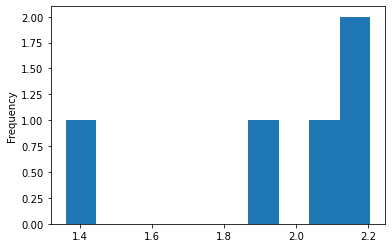

In [12]:
wine.groupby(['Alcohol'])['target'].mean().plot(kind='hist')

In [13]:
wine.groupby(['Alcohol'])['target'].count()

Alcohol
(11.029, 12.25]     37
(12.25, 12.74]      34
(12.74, 13.276]     35
(13.276, 13.748]    35
(13.748, 14.83]     36
Name: target, dtype: int64

<AxesSubplot:ylabel='Frequency'>

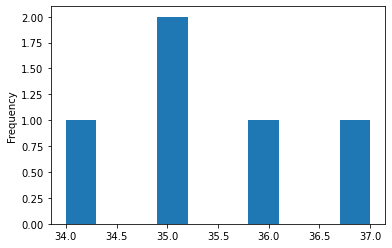

In [14]:
wine.groupby(['Alcohol'])['target'].count().plot(kind = 'hist')

In [17]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   target                177 non-null    int64   
 1   Alcohol               177 non-null    category
 2   Malic acid            177 non-null    category
 3   Ash                   177 non-null    category
 4   Alcalinity            177 non-null    category
 5   Magnesium             177 non-null    category
 6   Total phenols         177 non-null    category
 7   Flavanoids            177 non-null    category
 8   Nonflavanoid phenols  177 non-null    category
 9   Proanthocyanins       177 non-null    category
 10  Color intensity       177 non-null    category
 11  Hue                   177 non-null    category
 12  diluted wines         177 non-null    category
 13  Proline               177 non-null    category
dtypes: category(13), int64(1)
memory usage: 7.0 KB


<AxesSubplot:>

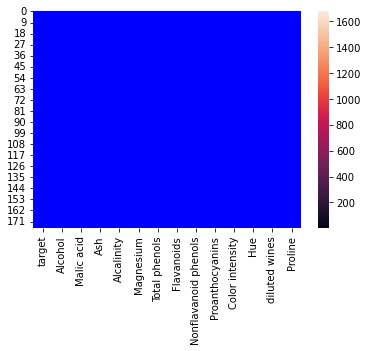

In [38]:
sns.heatmap(wine,linewidths=25,linecolor='blue',)

In [44]:
correlaation = wine.corr()
correlaation

,target,Alcohol,Malic acid,Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
target,1.000000,-0.321238,0.436127,-0.048260,-0.198944,-0.717933,-0.846485,0.487215,-0.494887,0.268562,-0.617690,-0.786428,-0.631227
Alcohol,-0.321238,1.000000,0.099963,0.210964,0.258742,0.284543,0.230133,-0.151445,0.127561,0.547883,-0.075375,0.057417,0.641068
Malic acid,0.436127,0.099963,1.000000,0.164955,-0.049049,-0.333512,-0.409324,0.291501,-0.217975,0.250053,-0.560854,-0.366720,-0.189512
Ash,-0.048260,0.210964,0.164955,1.000000,0.287107,0.128176,0.114084,0.187354,0.008082,0.258643,-0.075181,0.001503,0.222979
Magnesium,-0.198944,0.258742,-0.049049,0.287107,1.000000,0.208200,0.187101,-0.252091,0.226504,0.199337,0.052042,0.046961,0.387542
Total phenols,-0.717933,0.284543,-0.333512,0.128176,0.208200,1.000000,0.864046,-0.448301,0.610533,-0.056401,0.432987,0.699566,0.495839
Flavanoids,-0.846485,0.230133,-0.409324,0.114084,0.187101,0.864046,1.000000,-0.536326,0.650254,-0.174411,0.543208,0.786372,0.491180
Nonflavanoid phenols,0.487215,-0.151445,0.291501,0.187354,-0.252091,-0.448301,-0.536326,1.000000,-0.363268,0.140192,-0.261709,-0.501859,-0.308886
Proanthocyanins,-0.494887,0.127561,-0.217975,0.008082,0.226504,0.610533,0.650254,-0.363268,1.000000,-0.027112,0.294397,0.513415,0.325731
Color intensity,0.268562,0.547883,0.250053,0.258643,0.199337,-0.056401,-0.174411,0.140192,-0.027112,1.000000,-0.522615,-0.435744,0.315632


<AxesSubplot:>

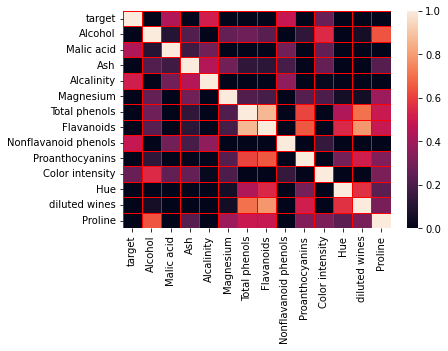

In [37]:
# sns.heatmap(correlaation,linewidths=5)
sns.heatmap(correlaation,linecolor='red',linewidths=1,vmin=0, vmax=1)

<AxesSubplot:>

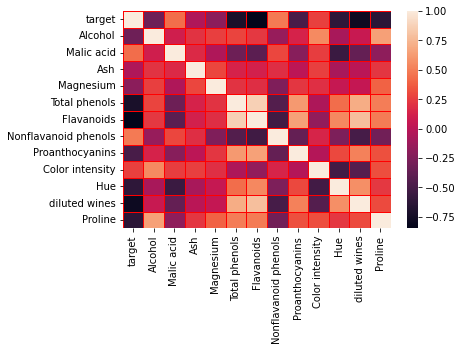

In [46]:
sns.heatmap(correlaation,linecolor='red',linewidths=1,)

<AxesSubplot:ylabel='Frequency'>

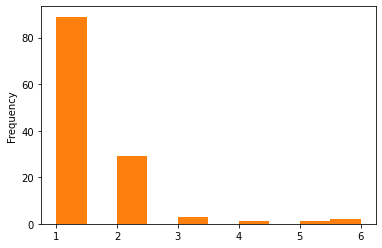

In [47]:
wine.groupby(['Alcohol'])['target'].count().plot(kind='hist')
wine.groupby(['Alcohol'])['target'].count().plot(kind='hist')

In [54]:
wine.head()

,target,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,13.20,1.78,2.14,"(10.599, 16.8]",100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,"(16.8, 18.6]",101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,"(10.599, 16.8]",113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,"(20.0, 22.0]",118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,"(10.599, 16.8]",112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [73]:
from sklearn.model_selection import train_test_split

x=wine[['Alcohol','Malic acid', 'Ash','Magnesium','Total phenols', 'Flavanoids', 'Nonflavanoid phenols']]
y=wine['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=123,)

In [74]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((123, 7), (54, 7), (123,), (54,))

In [75]:
# naive bayes

from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
cnb.fit(x_train,y_train)

CategoricalNB()

In [76]:
cnb.score(x_train,y_train)

0.967479674796748

In [77]:
cnb.score(x_test,y_test)

0.8333333333333334

In [81]:
print(cnb.category_count_)

[array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        27., 15.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15., 33.,
         7.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
        13.,  2.]]), array([[ 0., 33.,  5.,  4.,  1.,  0.],
       [ 7., 31.,  9.,  4.,  3.,  1.],
       [ 0.,  2.,  6.,  9.,  5.,  3.]]), array([[ 0.,  0., 43.,  0.],
       [ 0., 15., 39.,  1.],
       [ 0.,  0., 25.,  0.]]), array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 2., 1.,
        1., 1., 0., 0., 2., 4., 2., 1., 0., 1., 1., 2., 3., 0., 1., 2.,
        2

In [89]:
y_test[:10]

133    3
134    3
130    3
163    3
173    3
60     2
41     1
146    3
125    2
143    3
Name: target, dtype: int64

In [90]:
cnb.predict(x_test[:10])

array([2, 3, 2, 3, 3, 2, 1, 3, 2, 3], dtype=int64)

In [85]:
cnb.predict_proba(x_test)

array([[1.15975566e-02, 9.44604656e-01, 4.37977872e-02],
       [2.16309634e-04, 1.64502477e-01, 8.35281213e-01],
       [1.33447424e-04, 5.58173819e-01, 4.41692734e-01],
       [1.87842035e-03, 9.00334032e-03, 9.89118239e-01],
       [1.64845736e-03, 6.32089513e-03, 9.92030648e-01],
       [1.95565348e-02, 9.73409693e-01, 7.03377180e-03],
       [9.92662287e-01, 7.25600808e-03, 8.17053935e-05],
       [1.52117739e-05, 9.37047186e-02, 9.06280070e-01],
       [7.27731674e-02, 9.26136255e-01, 1.09057718e-03],
       [1.46009375e-04, 3.33118365e-02, 9.66542154e-01],
       [1.64845736e-03, 6.32089513e-03, 9.92030648e-01],
       [1.80750924e-02, 9.81460554e-01, 4.64353647e-04],
       [2.22987100e-01, 7.75859225e-01, 1.15367526e-03],
       [8.67688402e-01, 1.31973854e-01, 3.37744427e-04],
       [8.67395444e-01, 1.31929296e-01, 6.75260788e-04],
       [5.34977685e-01, 4.47530320e-01, 1.74919953e-02],
       [7.26557009e-02, 7.92549718e-02, 8.48089327e-01],
       [1.65368374e-03, 3.17046

In [91]:
cnb.coef_

[array([[-4.06044301, -4.06044301, -4.06044301, -4.06044301, -4.06044301,
         -4.06044301, -4.06044301, -4.06044301, -4.06044301, -4.06044301,
         -4.06044301, -4.06044301, -3.36729583, -0.7282385 , -1.28785429],
        [-4.24849524, -4.24849524, -4.24849524, -4.24849524, -4.24849524,
         -4.24849524, -4.24849524, -4.24849524, -4.24849524, -4.24849524,
         -4.24849524, -1.47590652, -0.72213472, -2.1690537 , -4.24849524],
        [-3.68887945, -3.68887945, -3.68887945, -3.68887945, -3.68887945,
         -3.68887945, -3.68887945, -3.68887945, -3.68887945, -3.68887945,
         -3.68887945, -3.68887945, -1.29098418, -1.04982212, -2.59026717]]),
 array([[-3.8918203 , -0.36545977, -2.10006083, -2.28238239, -3.19867312,
         -3.8918203 ],
        [-2.03143232, -0.64513796, -1.80828877, -2.50143595, -2.7245795 ,
         -3.41772668],
        [-3.4339872 , -2.33537492, -1.48807706, -1.13140211, -1.64222774,
         -2.04769284]]),
 array([[-3.8501476 , -3.8501476 , -